In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fertility_df = pd.read_csv('API_SP/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_279155.csv', on_bad_lines='skip', skiprows=4)
gdp_df = pd.read_csv('API_NY/API_NY.GDP.PCAP.PP.KD_DS2_en_csv_v2_45514.csv', on_bad_lines='skip', skiprows=4)

In [4]:
gdp_df = gdp_df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'], axis=1)
gdp_df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37406.173520,36558.972840,36099.942640,36504.688730,38868.333920,39597.659880,38511.336880,29236.047260,37333.515680,41273.615050
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3602.676618,3652.772991,3668.400279,3664.810708,3670.972022,3672.750831,3658.128493,3467.484700,3531.172747,3566.269439
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1516.273265,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4027.814199,4148.495951,4152.506646,4060.345071,4054.572453,4068.321122,4096.827363,3960.847898,4016.874461,4066.483230
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677


In [5]:
fertility_df = fertility_df.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'], axis=1)
fertility_df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,3.226000,...,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,NaN,NaN,NaN
1,Africa Eastern and Southern,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,6.828560,...,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709,NaN,NaN,NaN
2,Afghanistan,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,7.363000,...,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,NaN,NaN,NaN
3,Africa Western and Central,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,6.612775,...,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,NaN,NaN,NaN
4,Angola,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,7.332000,...,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,NaN,NaN,NaN


In [6]:
gdp_df = gdp_df.melt(['Country Name'], var_name='Year', value_name='gdp')
gdp_df.head()

,Country Name,Year,gdp
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [7]:
fertility_df = fertility_df.melt(['Country Name'], var_name='Year', value_name='fert_rate')
fertility_df.head()

,Country Name,Year,fert_rate
0,Aruba,1960,4.820000
1,Africa Eastern and Southern,1960,6.724125
2,Afghanistan,1960,7.282000
3,Africa Western and Central,1960,6.458448
4,Angola,1960,6.708000


In [8]:
merged_df = pd.merge(gdp_df, fertility_df, on=['Country Name', 'Year'])
merged_df.head()

,Country Name,Year,gdp,fert_rate
0,Aruba,1960,NaN,4.820000
1,Africa Eastern and Southern,1960,NaN,6.724125
2,Afghanistan,1960,NaN,7.282000
3,Africa Western and Central,1960,NaN,6.458448
4,Angola,1960,NaN,6.708000


In [9]:
merged_df.isna().sum()

Country Name       0
Year               0
gdp             9091
fert_rate        879
dtype: int64

In [10]:
df = merged_df.dropna()
df.head()


,Country Name,Year,gdp,fert_rate
7980,Aruba,1990,32278.868540,2.303000
7981,Africa Eastern and Southern,1990,3045.457644,6.166608
7983,Africa Western and Central,1990,2790.264157,6.518278
7984,Angola,1990,5793.084512,7.272000
7985,Albania,1990,4827.018090,2.900000


In [110]:
avg_fert_world = df.groupby('Year')['fert_rate'].mean().sort_values(ascending=False)
avg_fert_world = pd.DataFrame(avg_fert_world)
avg_fert_world = avg_fert_world.reset_index()
avg_fert_world['Year'] = avg_fert_world['Year'].astype(int)
avg_fert_world.head()
avg_fert_world.dtypes

Year           int64
fert_rate    float64
dtype: object

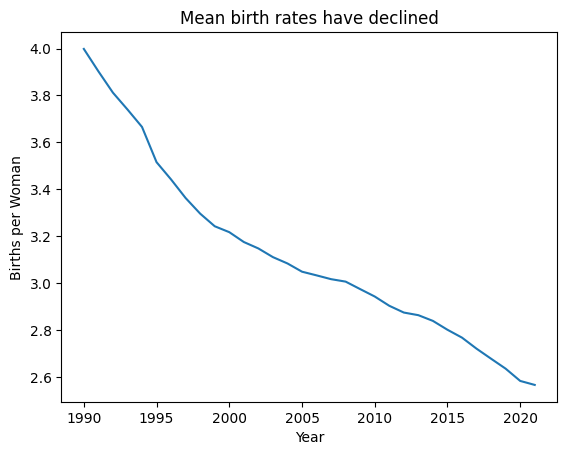

In [111]:
sns.lineplot(x='Year', y='fert_rate', data=avg_fert_world)
plt.xticks(np.arange(1990, 2021, step = 5))
plt.title("Mean birth rates have declined")
plt.ylabel("Births per Woman")
plt.show()

In [113]:
avg_gdp_world = df.groupby('Year')['gdp'].mean().sort_values(ascending=False)
avg_gdp_world = pd.DataFrame(avg_gdp_world)
avg_gdp_world= avg_gdp_world.reset_index()
avg_gdp_world['Year'] = avg_gdp_world['Year'].astype(int)
avg_gdp_world.head()
avg_gdp_world.dtypes

Year      int64
gdp     float64
dtype: object

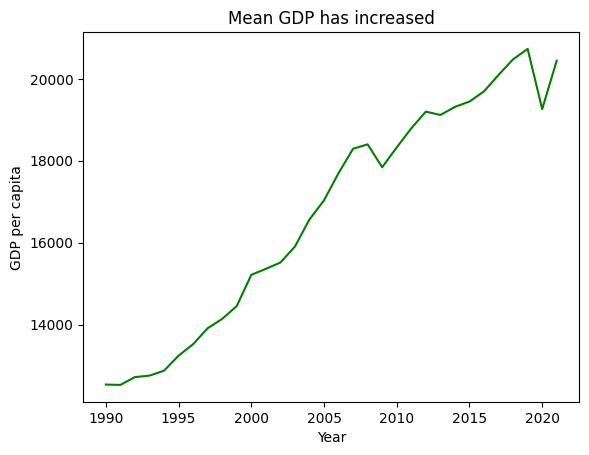

In [116]:
sns.lineplot(x='Year', y='gdp', data=avg_gdp_world, color="green")
plt.xticks(np.arange(1990, 2021, step = 5))
plt.title("Mean GDP has increased")
plt.ylabel("GDP per capita")
plt.show()

In [11]:
data_19 = df[df['Year'] == '2019']
data_19.head()

,Country Name,Year,gdp,fert_rate
15694,Aruba,2019,38511.336880,1.486000
15695,Africa Eastern and Southern,2019,3658.128493,4.482898
15696,Afghanistan,2019,2079.921861,4.870000
15697,Africa Western and Central,2019,4096.827363,5.118932
15698,Angola,2019,6602.269211,5.442000


(0.0, 8.0)

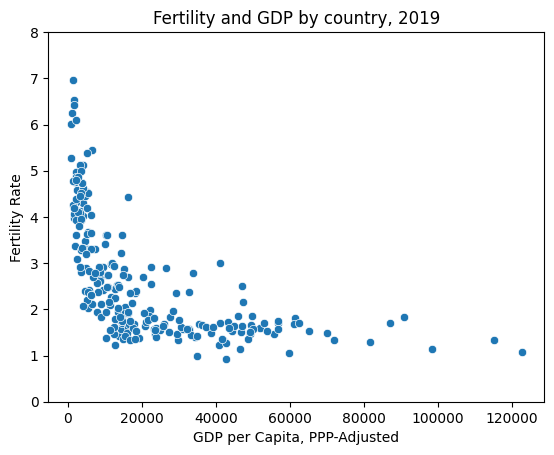

In [12]:
sns.scatterplot(data=data_19, x = 'gdp', y = 'fert_rate')
plt.title('Fertility and GDP by country, 2019')
plt.xlabel('GDP per Capita, PPP-Adjusted')
plt.ylabel('Fertility Rate')
plt.ylim(0, 8)

In [13]:
data_19['gdp'] = np.log(data_19['gdp'])

/var/folders/7h/klprm6qj2d18myjnt1vzbv4w0000gq/T/ipykernel_41634/3094580293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19['gdp'] = np.log(data_19['gdp'])


In [14]:
data_19.head()

,Country Name,Year,gdp,fert_rate
15694,Aruba,2019,10.558708,1.486000
15695,Africa Eastern and Southern,2019,8.204707,4.482898
15696,Afghanistan,2019,7.640086,4.870000
15697,Africa Western and Central,2019,8.317968,5.118932
15698,Angola,2019,8.795169,5.442000


Text(0.5, 0, 'Natural Log of GDP per Capita')

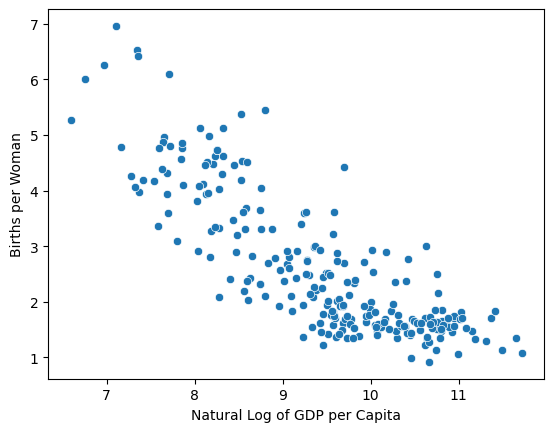

In [15]:
sns.scatterplot(data=data_19, x='gdp', y='fert_rate')
plt.ylabel('Births per Woman')
plt.xlabel('Natural Log of GDP per Capita')

In [16]:
df["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cyprus', 'Czechia', 'Germany',
       'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excludin

In [17]:
regions = df[df['Country Name'].isin(['Africa Eastern and Southern', 'Africa Western and Central',
                                      'Central Europe and the Baltics', 'East Asia & Pacific',
                                      'Latin America & Caribbean', 'Sub-Saharan Africa', 'North America',
                                      'Middle East & North Africa (excluding high income)', 'South Asia (IDA & IBRD)'])]
regions.head()

,Country Name,Year,gdp,fert_rate
7981,Africa Eastern and Southern,1990,3045.457644,6.166608
7983,Africa Western and Central,1990,2790.264157,6.518278
8016,Central Europe and the Baltics,1990,13981.948800,1.930878
8043,East Asia & Pacific,1990,5159.898746,2.601745
8114,Latin America & Caribbean,1990,10781.963210,3.262360


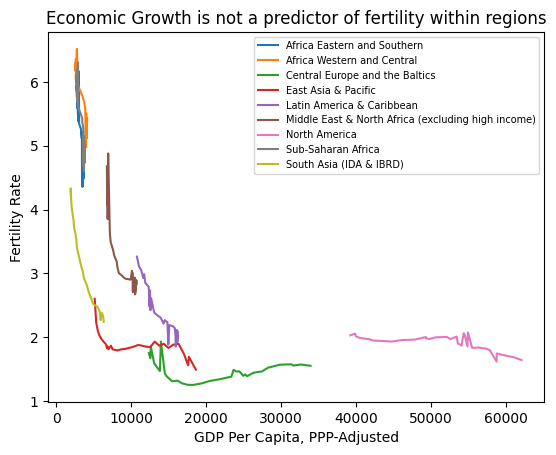

In [19]:
sns.lineplot(data=regions, x='gdp', y='fert_rate', hue='Country Name')
plt.ylabel('Fertility Rate')
plt.xlabel('GDP Per Capita, PPP-Adjusted')
plt.title('Economic Growth is not a predictor of fertility within regions')
plt.legend(fontsize = 7)

In [77]:
usa = df[df['Country Name'] == 'United States']
usa.head()

,Country Name,Year,gdp,fert_rate
8231,United States,1990,40451.49840,2.0810
8497,United States,1991,39871.34296,2.0625
8763,United States,1992,40707.29063,2.0460
9029,United States,1993,41279.51650,2.0195
9295,United States,1994,42419.19537,2.0015


Text(0.5, 0, 'GDP per Capita')

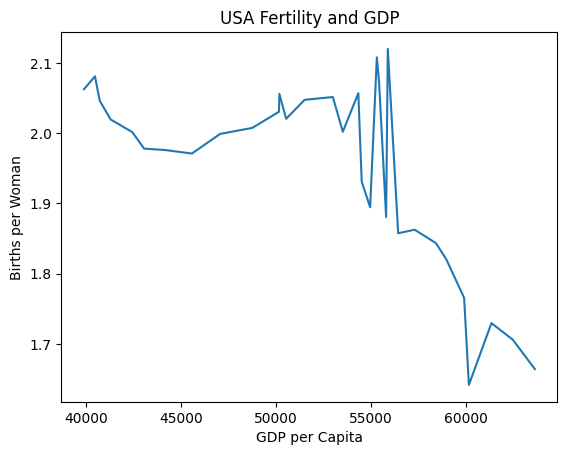

In [79]:
sns.lineplot(data=usa, x = 'gdp', y = 'fert_rate')
plt.title('USA Fertility and GDP')
plt.ylabel('Births per Woman')
plt.xlabel('GDP per Capita')

In [22]:
df["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cyprus', 'Czechia', 'Germany',
       'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excludin

In [59]:
countries_by_income = df[df['Country Name'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]
countries_by_income = countries_by_income.rename(columns={'Country Name': 'Country Type'})
countries_by_income['Year'] = countries_by_income['Year'].astype(int)
countries_by_income.dtypes
countries_by_income.head()


,Country Type,Year,gdp,fert_rate
8075,High income,1990,31786.326180,1.851728
8116,Low income,1990,1346.659024,6.495881
8119,Lower middle income,1990,3150.433386,4.477580
8136,Middle income,1990,4607.043856,3.478295
8229,Upper middle income,1990,5874.936014,2.705157


In [60]:
income_fert_rate = countries_by_income.groupby('Country Type')['fert_rate'].mean().sort_values(ascending=False)
income_fert_rate.head()

Country Type
Low income             5.650513
Lower middle income    3.372681
Middle income          2.627835
Upper middle income    1.955351
High income            1.688553
Name: fert_rate, dtype: float64

Text(0, 0.5, 'Mean Births per Woman')

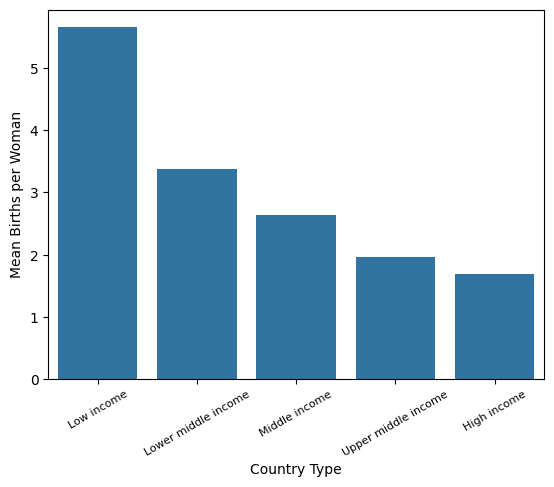

In [61]:
sns.barplot(income_fert_rate)
plt.xticks(fontsize=8, rotation=30)
plt.ylabel('Mean Births per Woman')

In [62]:
low_inc = countries_by_income[countries_by_income['Country Type'] == "Low income"]
low_middle_inc = countries_by_income[countries_by_income['Country Type'] == "Lower middle income"]
middle_inc = countries_by_income[countries_by_income['Country Type'] == "Middle income"]
upper_mid_inc = countries_by_income[countries_by_income['Country Type'] == "Upper middle income"]
high_inc = countries_by_income[countries_by_income['Country Type'] == "High income"]

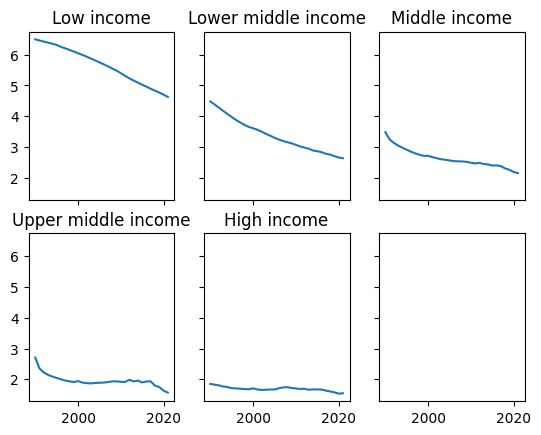

In [75]:
fig, ax = plt.subplots(nrows=2, ncols = 3, sharey=True, sharex=True)
ax[0,0].plot(low_inc['Year'], low_inc['fert_rate'])
ax[0,0].set_title("Low income")
ax[0,1].plot(low_middle_inc['Year'], low_middle_inc['fert_rate'])
ax[0,1].set_title("Lower middle income")
ax[0,2].plot(middle_inc['Year'], middle_inc['fert_rate'])
ax[0,2].set_title("Middle income")
ax[1,0].plot(upper_mid_inc['Year'], upper_mid_inc['fert_rate'])
ax[1,0].set_title("Upper middle income")
ax[1,1].plot(high_inc['Year'], high_inc['fert_rate'])
ax[1,1].set_title("High income")
for ax in ax.flat:
    ax.label_outer()

Text(0.5, 0, 'GDP Per Capita, PPP-Adjusted')

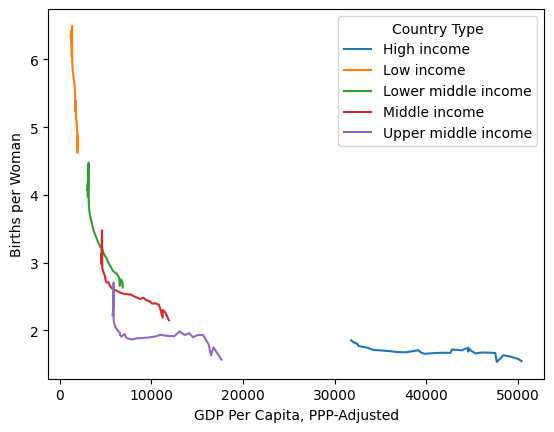

In [76]:
sns.lineplot(data=countries_by_income, x='gdp', y='fert_rate', hue = 'Country Type')
plt.ylabel('Births per Woman')
plt.xlabel('GDP Per Capita, PPP-Adjusted')